<a href="https://colab.research.google.com/github/Malachirag/Final-Project/blob/main/ALL_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

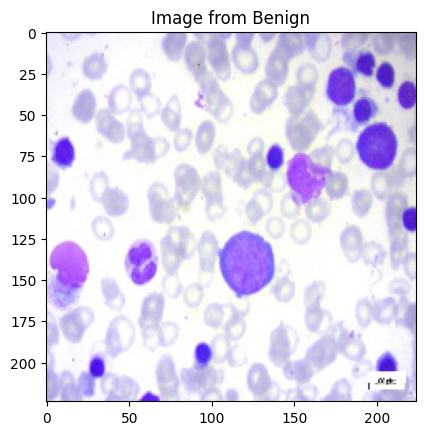

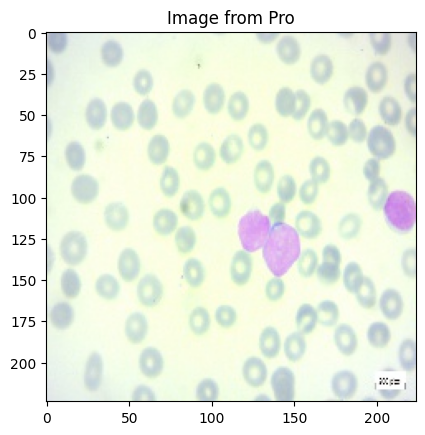

In [11]:
import os
from PIL import Image
import matplotlib.pyplot as plt

# Define your dataset directory
dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset"

# Function to display one image from each subfolder
def display_one_image_per_subfolder(dataset_dir):
    for subdir in os.listdir(dataset_dir):
        subdir_path = os.path.join(dataset_dir, subdir)

        if os.path.isdir(subdir_path):
            # Get the list of image files in the subfolder
            image_files = [f for f in os.listdir(subdir_path) if f.endswith(('.jpg', '.jpeg', '.png'))]

            if image_files:
                # Take the first image from the list
                first_image_path = os.path.join(subdir_path, image_files[0])

                # Load and display the image
                img = Image.open(first_image_path)
                plt.imshow(img)
                plt.title(f"Image from {subdir}")
                plt.show()

# Call the function to display one image from each subfolder
display_one_image_per_subfolder(dataset_dir)


In [ ]:
#checking the size of images previous
from PIL import Image
import os

# Define your dataset directory
dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset"

# Function to get the size of all images in a directory
def get_image_sizes(directory):
    sizes = []

    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    # Load the image
                    img_path = os.path.join(subdir_path, filename)
                    img = Image.open(img_path)

                    # Get the size of the image
                    img_size = img.size
                    sizes.append((img_path, img_size))

    return sizes

# Call the function to get image sizes in the dataset directory
image_sizes = get_image_sizes(dataset_dir)

# Print the image sizes
for img_path, img_size in image_sizes:
    print(f"Image: {img_path}, Size: {img_size}")


Data **preprocessing**

In [15]:
#image resizing
from PIL import Image
import os

# Define your dataset directory
dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset"

# Define the target size for resizing
target_size = (224, 224)  # Adjust as needed

# Function to resize all images in a directory
def resize_images_in_directory(directory, target_size):
    for subdir in os.listdir(directory):
        subdir_path = os.path.join(directory, subdir)

        if os.path.isdir(subdir_path):
            for filename in os.listdir(subdir_path):
                if filename.endswith(('.jpg', '.jpeg', '.png')):
                    # Load the image
                    img_path = os.path.join(subdir_path, filename)
                    img = Image.open(img_path)

                    # Resize the image
                    resized_img = img.resize(target_size)

                    # Save the resized image (overwrite the original or save to a new directory)
                    resized_img.save(img_path)

# Call the function to resize images in the dataset directory
resize_images_in_directory(dataset_dir, target_size)


In [27]:
import os
import shutil
from sklearn.model_selection import train_test_split

# Define your main dataset directory
main_dataset_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset"

# Define the directories for benign and pro images
benign_dir = os.path.join(main_dataset_dir, "Benign")
pro_dir = os.path.join(main_dataset_dir, "Pro")

# Define the directories for training and test sets
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Train1"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Test1"

# Create the training and test directories
os.makedirs(os.path.join(train_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(train_dir, "Pro"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Benign"), exist_ok=True)
os.makedirs(os.path.join(test_dir, "Pro"), exist_ok=True)

# Function to split the dataset into training and test sets
def split_dataset(src_dir, train_dst, test_dst, test_size=0.2, random_state=42):
    # Get the list of all image files in the source directory
    all_images = [f for f in os.listdir(src_dir) if f.endswith(('.jpg', '.jpeg', '.png'))]

    # Split the images into training and test sets
    train_images, test_images = train_test_split(all_images, test_size=test_size, random_state=random_state)

    # Copy images to the training set
    for img in train_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(train_dst, img)
        shutil.copy(src_path, dst_path)

    # Copy images to the test set
    for img in test_images:
        src_path = os.path.join(src_dir, img)
        dst_path = os.path.join(test_dst, img)
        shutil.copy(src_path, dst_path)

# Split the dataset for benign images
split_dataset(benign_dir, os.path.join(train_dir, "Benign"), os.path.join(test_dir, "Benign"))

# Split the dataset for pro images
split_dataset(pro_dir, os.path.join(train_dir, "Pro"), os.path.join(test_dir, "Pro"))


In [28]:
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Train1"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Test1"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the train dataset: {num_train_images}")
print(f"Number of images in the test dataset: {num_test_images}")


Number of images in the train dataset: 1046
Number of images in the test dataset: 262


In [ ]:
#Data augmenation
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
import os

# Define the path to your original training dataset
original_train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Train1"

# Define the path to your augmented training dataset
augmented_train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Augmented1"

# Create an ImageDataGenerator with augmentation parameters
datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode="nearest"
)

# Iterate through each class (benign and pro)
for class_name in os.listdir(original_train_dir):
    class_path = os.path.join(original_train_dir, class_name)

    # Create separate folders for augmented images
    augmented_class_path = os.path.join(augmented_train_dir, class_name)
    os.makedirs(augmented_class_path, exist_ok=True)

    # Iterate through images in the original class folder
    for filename in os.listdir(class_path):
        img_path = os.path.join(class_path, filename)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)

        # Generate augmented images and save to the new folder
        i = 0
        for batch in datagen.flow(x, batch_size=1, save_to_dir=augmented_class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            if i >= 5:  # Adjust the number of augmented images to generate
                break


In [2]:
#count of images in train after data augmentation
def count_images_in_directory(directory):
    return sum([len(files) for _, _, files in os.walk(directory)])

# Specify the paths to your train and test directories
train_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Augmented1/Benign"
test_dir = "/content/drive/MyDrive/FINAL YEAR PROJECT/Dataset/Augmented1/Pro"

# Count the number of images in the train and test directories
num_train_images = count_images_in_directory(train_dir)
num_test_images = count_images_in_directory(test_dir)

# Print the results
print(f"Number of images in the train dataset: {num_train_images}")
print(f"Number of images in the test dataset: {num_test_images}")


Number of images in the train dataset: 2421
Number of images in the test dataset: 2748
